In [1]:
from numpy import polyfit, arange, polyval

n = (len(CO2_Cap))

dx = .001
y_CO2_array = arange(.04, .10+dx, dx)


p = [3.58186260e+07, -7.43273232e+06, 5.52655474e+05, -1.79252948e+04, 3.12753126e+02]
p_linear = polyfit(y_CO2_array[20:n], CO2_Cap[20:], 1)
print(p_linear)
# p = polyfit(y_CO2_array[:n], CO2_Cap, 4)
# print(p)
p = [ 3.58186260e+07, -7.43273232e+06,  5.52655474e+05, -1.79252948e+04, 3.12753126e+02]
p_linear = [-890.41996267,  138.72207665]

CO2_cap_guess = []

for y_CO2 in y_CO2_array[:n]:

    if y_CO2 < .06:
        CO2_cap_guess.append(polyval(p, y_CO2))
    elif y_CO2 >= .06:
        CO2_cap_guess.append(polyval(p_linear, y_CO2))

plt.plot(y_CO2_array[:n], CO2_cap_guess, '--')
plt.plot(y_CO2_array[:n], CO2_Cap, 'x')
plt.show()

print(y_CO2_array[n])


NameError: name 'CO2_Cap' is not defined

In [ ]:
from numpy import array
from get_Data import get_Morgan_data

data = array([185, 0.15, .07, 95, 0.3])

vapor, liquid = get_Morgan_data(array_data=data, source='Thesis')

print(vapor['C']['MEA'])

In [ ]:
from numpy import arange

y_CO2_start = .095
y_CO2_end = .1
dx = .005
y_CO2_array = arange(y_CO2_start, .1, dx)
print(y_CO2_array)

In [ ]:
# if Z < .9:
        #     # print(sol)
        #     for s in sol:
        #         # print(s)
        #         if s  > 709:
        #             print(f'error = {s}')
        #
        #     try:
        #         ans = exp(sol)
        #         # print(f'x = {x}')
        #         # print(f'Bmix = {B_mix:.6f}, Amix = {A_mix:.6f}')
        #         # print(f'Coeff: {m3}, {m2}, {m1}, {m0}')
        #         # print(f'Z = {Z:.8f}')
        #         # # print(Z - B_mix)
        #         # # print(((Z + 2.414 * B_mix) / (Z - .414 * B_mix)))
        #         # print(sol)
        #         # print()
        #
        #     except:
        #         # print(f'x = {x}')
        #         # print(f'Bmix = {B_mix:.6f}, Amix = {A_mix:.6f}')
        #         # print('Runtime Warning was Caught')
        #         # print(f'Coeff: {m3}, {m2}, {m1}, {m0}')
        #         # print(f'Z = {Z:.8f}')
        #         # # print(Z - B_mix)
        #         # # print(((Z + 2.414 * B_mix) / (Z - .414 * B_mix)))
        #         # print(sol)
        #
        #         ans = [0, 0, 0, 0, 0]
        # else:

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define the function to be solved
def fun(x):
    eq1 = x[0]**2 - 4
    eq2 = x[1]**2 - 9
    return np.sum(np.array([eq1**2, eq2**2]))

# Initial guess
x0 = np.array([1, 1])

# Define the lower and upper bounds for each variable
bounds = [(None, None), (-3, 3)]  # bounds for x1 and x2

# Define the constraints
cons = {'type': 'eq', 'fun': fun}

# Call the minimize function with trust-constr method
result = minimize(fun, x0, method='trust-constr', constraints=cons, bounds=bounds)

# Access the solution
sol = result.x
print("Solution: ", sol)

In [ ]:
import numpy as np
from scipy.optimize import root

# Define the function to be solved
def fun(x):
    eq1 = x[0]**2 - 4
    eq2 = x[1]**2 - 9
    return np.array([eq1, eq2])

# Initial guess
x0 = np.array([1, 1])

# Define the lower and upper bounds for each variable
bounds = [(None, None), (-3, 3)]  # bounds for x1 and x2

# Define the constraints


# Call the minimize function with trust-constr method
result = root(fun, x0)

# Access the solution
sol = result.x
print("Solution: ", sol)

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define the function to be solved
def fun(x):
    eq1 = x[0]**2 - 4
    eq2 = x[1]**2 - 9
    return np.array([eq1, eq2])

# Define the residual function for the optimization
def residual(x):
    return np.linalg.norm(fun(x))

# Initial guess
x0 = np.array([1, 1])

# Define the bounds for each variable
bounds = [(None, None), (-3, 3)]  # bounds for x1 and x2

# Call the minimize function with SLSQP method
result = minimize(residual, x0, method='SLSQP', bounds=bounds)

# Access the solution
sol = result.x
print("Solution: ", sol)

In [ ]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

# Define the ODE system
def fun(t, y):
    return np.array([y[1], -y[0]])

# Define the boundary conditions
def bc(ya, yb):
    return np.array([ya[0] - 1, yb[0] - 2])

# Define the mesh grid
t = np.linspace(0, 1, 100)

# Define the initial guess for the solution
y_guess = np.zeros((2, t.size))
print(y_guess)

# Call solve_bvp for solving the BVP
sol = solve_bvp(fun, bc, t, y_guess)

# Extract the solution
y = sol.sol(t)

# Plot the solution
plt.plot(t, y[0], label='y1')
plt.plot(t, y[1], label='y2')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Solution of BVP using solve_bvp')
plt.show()

In [13]:
from numpy import array
from get_Data import get_Morgan_data

m_T_l = 185               # Liquid Mass Flow Rate (kg/s)
alpha = 0.15            # Lean Solvent CO2 Loading (mol CO2/mol MEA)
y_CO2 = .05  # Vapor Mole Fraction of CO2
m_T_v = 85               # Vapor Mass Flow Rate (kg/s)plo
w_MEA = 0.3              # MEA weight fraction in Lean Solvent

data = array([m_T_l, alpha, y_CO2, m_T_v, w_MEA])

vapor, liquid = get_Morgan_data(array_data=data, source='Thesis')

display(vapor)
display(liquid)

,w,m,MW,n,u,C,y
CO2,0.077824,6.615012,0.044010,150.308728,224.837915,2.113412,0.050000
MEA,0.000000,0.000000,0.061083,0.000000,224.837915,0.000000,0.000000
H2O,0.051559,4.382534,0.018015,243.267316,224.837915,3.420454,0.080923
N2,0.793685,67.463263,0.028014,2408.241117,224.837915,33.861012,0.801098
O2,0.076932,6.539192,0.031999,204.357407,224.837915,2.873362,0.067979
T,1.000000,85.000000,0.000000,3006.174569,224.837915,42.268240,1.000000


,w,m,MW,n,u,C,x
CO2,0.032422,5.998043,0.044010,136.289743,0.584846,736.701313,0.017251
MEA,0.300000,55.500000,0.061083,908.598287,0.584846,4911.342090,0.115008
H2O,0.667578,123.501957,0.018015,6855.392725,0.584846,37056.176891,0.867740
N2,0.000000,0.000000,0.028014,0.000000,0.584846,0.000000,0.000000
O2,0.000000,0.000000,0.031999,0.000000,0.584846,0.000000,0.000000
T,1.000000,185.000000,0.000000,7900.280754,0.584846,42704.220294,1.000000


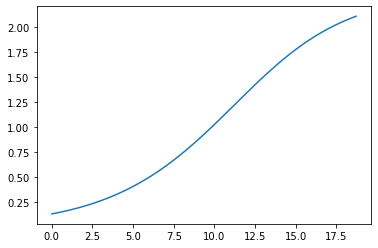

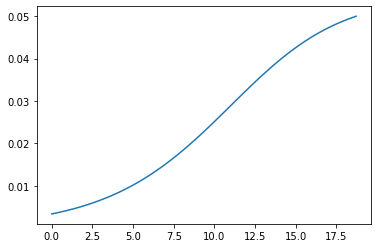

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from Parameters import z

df = pd.read_csv('data/Concentrations.csv')
Cv_CO2 = df['Cv_CO2']

plt.figure()
plt.plot(z, Cv_CO2)


df = pd.read_csv('data/Vapor_Comp.csv')
y_CO2 = df['Cv_CO2']

plt.figure()
plt.plot(z, y_CO2)

In [12]:
from Surrogate import f_CO2_guess

y_CO2_start = .04
y_CO2_end = .09
dx = .01
y_CO2_array = arange(y_CO2_start, y_CO2_end+dx, dx)

for y_CO2 in y_CO2_array:
    print(f_CO2_guess(y_CO2))

0.96
0.929
0.853
0.764
0.682
0.617
